## Predicting the “Customer Life Time Value”

## Load the libraries



In [10]:
# Loadind the required modules to read the data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# skip warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

## Load Data

In [11]:
df = pd.read_csv("train-1574429526318.csv")

In [12]:
df.shape

(9806, 22)

There are a total of 9806 observations in the data set and 22 features. 

## Exploratory Data Analysis

Let us take a look at a portion of the data.

We will create a function to set all needed

In [13]:
def set_pandas_display_options() :

    pd.options.display.max_columns = 1000
    pd.options.display.max_rows = 1000
    pd.options.display.max_colwidth = 199
    pd.options.display.precision = 3

    
    
set_pandas_display_options()

In [14]:
df.head()

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.373,Basic,Bachelor,Unemployed,F,0,"17.7,77.7",Urban,Married,67.0,2,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214,Four-Door Car,2.0
1,2057,8005.965,Basic,College,Employed,M,63357,"28.8,76.6",Suburban,Married,101.0,26,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.509,SUV,2.0
2,4119,8646.504,Basic,High School or Below,Employed,F,64125,"21.6,88.4",Urban,Married,108.0,3,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.819,SUV,1.0
3,1801,9294.089,Basic,College,Employed,M,67544,"19,72.5",Suburban,Married,116.0,2,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800,SUV,3.0
4,9618,5595.971,Basic,Bachelor,Retired,F,19651,"19.1,74.7",Suburban,Married,72.0,3,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600,Two-Door Car,3.0


Let us check the unique values in ID

In [15]:
df.CustomerID.nunique()

9806

As all the values in this column are unique, we will set Id as row index

In [16]:
df.set_index('CustomerID', inplace = True)

NameError: name 'plt' is not defined

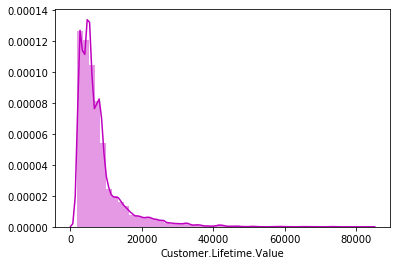

In [9]:
sns.distplot(df['Customer.Lifetime.Value'], color = "m")
plt.show()

its shown like right skewed.

In [8]:
df.describe()

,Customer.Lifetime.Value,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size
count,9806.000,9012.000,9806.000,9806.000,8988.000,9685.00,9806.000,9680.000
mean,7998.047,93.341,15.144,48.165,0.379,2.96,438.267,2.090
std,6848.056,34.418,10.004,27.964,0.896,2.39,293.502,0.539
min,1898.008,61.000,0.000,0.000,0.000,1.00,0.099,1.000
25%,4013.949,68.750,6.000,24.000,0.000,1.00,280.353,2.000
50%,5780.182,83.000,14.000,48.000,0.000,2.00,384.007,2.000
75%,8960.280,109.000,23.000,71.750,0.000,4.00,553.541,2.000
max,83325.381,297.000,35.000,99.000,5.000,9.00,2893.240,3.000


### Let us check if all columns are in appropriate data format.

In [9]:
df.dtypes

Customer.Lifetime.Value          float64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                            object
Location.Geo                      object
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints        float64
Number.of.Policies               float64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                     float64
dtype: object

In [10]:
df = pd.read_csv("train-1574429526318.csv", na_values = '?')
df.dtypes

CustomerID                         int64
Customer.Lifetime.Value          float64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location.Geo                      object
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints        float64
Number.of.Policies               float64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                     float64
dtype: object

In [11]:
df.set_index('CustomerID', inplace = True)

In [12]:
df.drop(['Location.Geo'], axis=1, inplace=True)

In [13]:
df.columns

Index(['Customer.Lifetime.Value', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Income', 'Location.Code', 'Marital.Status',
       'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [14]:
cat_cols = ['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Code', 'Marital.Status', 'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class', 'Vehicle.Size']


# create a list for all numerical column names
num_cols = df.columns[~df.columns.isin(cat_cols)]

# remove target column('Customer.Lifetime.Value')
num_cols = num_cols.drop('Customer.Lifetime.Value')

num_cols

Index(['Income', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Total.Claim.Amount'],
      dtype='object')

In [15]:
for x in cat_cols :
    print(x, '----->>', df[x].unique(), '\n')

Coverage ----->> ['Basic' 'Extended' nan 'Premium'] 

Education ----->> ['Bachelor' 'College' 'High School or Below' 'Doctor' nan 'Master'] 

EmploymentStatus ----->> ['Unemployed' 'Employed' 'Retired' 'Medical Leave' 'Disabled' nan] 

Gender ----->> ['F' 'M' nan] 

Location.Code ----->> ['Urban' 'Suburban' 'Rural' nan] 

Marital.Status ----->> ['Married' 'Divorced' 'Single' nan] 

Number.of.Policies ----->> [ 2.  5.  3.  6.  1.  9.  8. nan  7.  4.] 

Policy.Type ----->> ['Personal Auto' 'Corporate Auto' 'Special Auto' nan] 

Policy ----->> ['Personal L2' 'Personal L1' 'Corporate L3' 'Special L2' 'Personal L3'
 'Corporate L1' 'Corporate L2' nan 'Special L3' 'Special L1'] 

Renew.Offer.Type ----->> ['Offer2' 'Offer1' 'Offer3' nan 'Offer4'] 

Sales.Channel ----->> ['Branch' 'Agent' 'Web' 'Call Center' nan] 

Vehicle.Class ----->> ['Four-Door Car' 'SUV' 'Two-Door Car' 'Luxury SUV' 'Sports Car'
 'Luxury Car' nan] 

Vehicle.Size ----->> [ 2.  1.  3. nan] 



In [16]:
for x in num_cols :
    print(x, '----->>', df[x].nunique(), ' :- ', df[x].unique()[:10], '\n')

Income ----->> 4621  :-  [    0. 63357. 64125. 67544. 19651. 23589. 74126. 31409. 58577. 19683.] 

Monthly.Premium.Auto ----->> 191  :-  [ 67. 101. 108. 116.  72. 211.  90.  93. 110. 117.] 

Months.Since.Last.Claim ----->> 36  :-  [ 2 26  3 30 14 10  6 17 13  4] 

Months.Since.Policy.Inception ----->> 100  :-  [33 42 44 15 68 13 76 50 62 41] 

Number.of.Open.Complaints ----->> 6  :-  [nan  0.  1.  2.  3.  5.  4.] 

Total.Claim.Amount ----->> 4125  :-  [ 267.214383  565.508572  369.818708  556.8       345.6      1012.8
  478.751065  381.960657  303.872752  561.6     ] 



In [17]:
df[num_cols].describe()

,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Total.Claim.Amount
count,9688.000,9012.000,9806.000,9806.000,8988.000,9806.000
mean,37511.055,93.341,15.144,48.165,0.379,438.267
std,30292.974,34.418,10.004,27.964,0.896,293.502
min,0.000,61.000,0.000,0.000,0.000,0.099
25%,0.000,68.750,6.000,24.000,0.000,280.353
50%,33767.500,83.000,14.000,48.000,0.000,384.007
75%,62018.000,109.000,23.000,71.750,0.000,553.541
max,99981.000,297.000,35.000,99.000,5.000,2893.240


In [18]:
df.isnull().sum()

Customer.Lifetime.Value            0
Coverage                         925
Education                        129
EmploymentStatus                 118
Gender                           129
Income                           118
Location.Code                    119
Marital.Status                   129
Monthly.Premium.Auto             794
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints        818
Number.of.Policies               121
Policy.Type                      891
Policy                           121
Renew.Offer.Type                 128
Sales.Channel                    128
Total.Claim.Amount                 0
Vehicle.Class                    126
Vehicle.Size                     126
dtype: int64

In [19]:
# independent variables
X = df.drop('Customer.Lifetime.Value', axis = 1)

# dependent variable
y = df['Customer.Lifetime.Value']

### Function to pre-process data

We will write a function to pre-process data for following functions. This function will be called to transform both train and test datasets.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_imputer = SimpleImputer()
cat_imputer = SimpleImputer(strategy = 'most_frequent')
num_scaler = StandardScaler()

### Function for Model Fit & Predict

We will write a function for following functions. 

- Fit the model on train data
- Perform cross-validation when needed
- Predict on train and test data

In [21]:
def prepare_data(X, y, split_size = 0.3) :
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = split_size)  
    
    num_imputer.fit(X_train[num_cols])
    cat_imputer.fit(X_train[cat_cols])
    num_scaler.fit(X_train[num_cols])

    print(X_train.shape)
    print(X_test.shape)

    return X_train, X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = prepare_data(X, y)

(6864, 19)
(2942, 19)


In [23]:
def preprocess_data(data) :
    
    # impute numerical features
    data[num_cols] = num_imputer.transform(data[num_cols])
    data[cat_cols] = cat_imputer.transform(data[cat_cols])

    # dummify categorical features
    data[cat_cols] = data[cat_cols].astype('category')
    data = pd.get_dummies(data, drop_first = True)

    return data

In [24]:
X_train = preprocess_data(X_train)
X_train.head()
X_train.shape

(6864, 52)

In [25]:
X_test = preprocess_data(X_test)
X_test.head()

,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Total.Claim.Amount,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location.Code_Suburban,Location.Code_Urban,Marital.Status_Married,Marital.Status_Single,Number.of.Policies_2.0,Number.of.Policies_3.0,Number.of.Policies_4.0,Number.of.Policies_5.0,Number.of.Policies_6.0,Number.of.Policies_7.0,Number.of.Policies_8.0,Number.of.Policies_9.0,Policy.Type_Personal Auto,Policy.Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew.Offer.Type_Offer2,Renew.Offer.Type_Offer3,Renew.Offer.Type_Offer4,Sales.Channel_Branch,Sales.Channel_Call Center,Sales.Channel_Web,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car,Vehicle.Size_2.0,Vehicle.Size_3.0
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7493,18024.0,65.000,13.0,1.0,0.0,312.00,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
102,20951.0,65.000,2.0,50.0,0.0,312.00,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
11429,0.0,93.587,19.0,27.0,0.0,336.00,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8594,76792.0,62.000,12.0,27.0,0.0,297.60,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9153,0.0,133.000,34.0,77.0,1.0,945.17,1,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


## Model Building

In [26]:
from sklearn.model_selection import GridSearchCV

def model_building(model, params = None, k = 1) :
    
    if params == None :
        model.fit(X_train, y_train)
        
        # return fitted model & train-test predictions
        return (model, model.predict(X_train), model.predict(X_test))
    
    else :
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        model_cv.fit(X_train, y_train)
        model = model_cv.best_estimator_
        
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X_train), model.predict(X_test))

In [27]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

model, pred_train, pred_test = model_building(knn)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def model_evaluation(actuals, predictions):
    print('\RMSE :')
    rms = sqrt(mean_squared_error(actuals, predictions))
    
    return rms

In [30]:
model_evaluation(y_train, pred_train)

\RMSE :


5564.75108330946

In [31]:
model_evaluation(y_test, pred_test)

\RMSE :


6538.04501314544

this model performing not well as both train and test errors are high

In [32]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

model, pred_train_1, pred_test_1 = model_building(dtr)

In [33]:
model_evaluation(y_train, pred_train_1)


\RMSE :


1.5001747149330846e-13

In [34]:
model_evaluation(y_test, pred_test_1)

\RMSE :


5010.539617680865

model is overfitting on train 

In [35]:
parameters = {'max_depth' : range(1,20), 
              'min_impurity_decrease' : [0.0001, 0.01]}

model_cv, model_3, pred_train_3, pred_test_3 = model_building(dtr, 
                                                              parameters, 
                                                              20)

In [36]:
model_cv.best_params_

{'max_depth': 4, 'min_impurity_decrease': 0.0001}

In [41]:
model_evaluation(y_train, pred_train_3)

\RMSE :


4245.309631060501

In [42]:
model_evaluation(y_test, pred_test_3)

\RMSE :


4226.161972806877

now RMSE got reduced.so its better model than previous one.

let us build a another model and we check the error metrics 

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:

X_train_cr = X_train[['Income','Total.Claim.Amount', 'Months.Since.Last.Claim']]
X_test_cr = X_test[['Income','Total.Claim.Amount','Months.Since.Last.Claim']]

model_cr, pred_train_cr, pred_test_cr = model_building(LinearRegression())


model_evaluation(y_train, pred_train_cr)


\RMSE :


4302.891285264993

In [82]:
model_evaluation(y_test, pred_test_cr)

\RMSE :


4097.687280225081

decision tree model better than linear model

In [59]:
df1 = pd.read_csv("test-1574429501088.csv", na_values = '?')

In [60]:
df1.head()

,CustomerID,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,17,Basic,Bachelor,Employed,M,43836.0,"12.6,79.4",Rural,Single,73.0,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.131,Four-Door Car,Medsize
1,19,Extended,College,Employed,F,28812.0,"17.3,78.4",Urban,Married,93.0,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.528,Four-Door Car,Medsize
2,29,Premium,Master,Employed,M,77026.0,"18.4,73.5",Urban,Married,110.0,9,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.030,Four-Door Car,Medsize
3,34,Basic,Bachelor,Employed,F,24599.0,"17.1,78.2",Rural,Married,64.0,12,50,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.920,Four-Door Car,Medsize
4,37,Extended,Bachelor,Disabled,F,13789.0,"13,80.1",Suburban,Divorced,79.0,8,49,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.200,Four-Door Car,Medsize


In [61]:
df1.isnull().sum()

CustomerID                         0
Coverage                           0
Education                          0
EmploymentStatus                   0
Gender                             0
Income                           239
Location.Geo                       0
Location.Code                      0
Marital.Status                     0
Monthly.Premium.Auto              72
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints          0
Number.of.Policies                 0
Policy.Type                       42
Policy                             0
Renew.Offer.Type                   0
Sales.Channel                      0
Total.Claim.Amount                 0
Vehicle.Class                      0
Vehicle.Size                       0
dtype: int64

In [62]:
df1.dtypes

CustomerID                         int64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location.Geo                      object
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints          int64
Number.of.Policies                 int64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                      object
dtype: object

In [63]:
df1.drop(['Location.Geo'], axis=1, inplace=True)

In [64]:
df1_cat_cols = ['Coverage','Gender', 'Marital.Status', 'Education', 'EmploymentStatus' , 'Policy',
            'Number.of.Policies','Renew.Offer.Type', 'Sales.Channel',
            'Vehicle.Class', 'Vehicle.Size', 'Claim_cat','Income_cat', 'Inception_cat','Number.of.Open.Complaints','Location.Code' ]

# create a list for all numerical column names
df1_num_cols = df.columns[~df.columns.isin(cat_cols)]
df1_num_cols

Index(['Customer.Lifetime.Value', 'Income', 'Monthly.Premium.Auto',
       'Months.Since.Last.Claim', 'Months.Since.Policy.Inception',
       'Number.of.Open.Complaints', 'Total.Claim.Amount'],
      dtype='object')

In [65]:
tr_df1 = preprocess_data(df1)
tr_df1.head()

,CustomerID,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Total.Claim.Amount,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Unemployed,Gender_M,Location.Code_Suburban,Location.Code_Urban,Marital.Status_Married,Marital.Status_Single,Number.of.Policies_2,Number.of.Policies_3,Number.of.Policies_4,Number.of.Policies_5,Number.of.Policies_6,Number.of.Policies_7,Number.of.Policies_8,Number.of.Policies_9,Policy.Type_Personal Auto,Policy.Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew.Offer.Type_Offer2,Renew.Offer.Type_Offer3,Renew.Offer.Type_Offer4,Sales.Channel_Branch,Sales.Channel_Call Center,Sales.Channel_Web,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car,Vehicle.Size_Medsize,Vehicle.Size_Small
0,17,43836.0,73.0,12.0,44.0,0.0,138.131,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,19,28812.0,93.0,17.0,7.0,0.0,425.528,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,29,77026.0,110.0,9.0,82.0,2.0,472.030,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,34,24599.0,64.0,12.0,50.0,1.0,42.920,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,37,13789.0,79.0,8.0,49.0,0.0,379.200,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [66]:
tr_df1.isnull().sum()

CustomerID                        0
Income                            0
Monthly.Premium.Auto              0
Months.Since.Last.Claim           0
Months.Since.Policy.Inception     0
Number.of.Open.Complaints         0
Total.Claim.Amount                0
Coverage_Extended                 0
Coverage_Premium                  0
Education_College                 0
Education_Doctor                  0
Education_High School or Below    0
Education_Master                  0
EmploymentStatus_Employed         0
EmploymentStatus_Medical Leave    0
EmploymentStatus_Unemployed       0
Gender_M                          0
Location.Code_Suburban            0
Location.Code_Urban               0
Marital.Status_Married            0
Marital.Status_Single             0
Number.of.Policies_2              0
Number.of.Policies_3              0
Number.of.Policies_4              0
Number.of.Policies_5              0
Number.of.Policies_6              0
Number.of.Policies_7              0
Number.of.Policies_8        

In [69]:
lr = linear_model.LinearRegression() 
lr.fit(X_train,y_train)

NameError: name 'linear_model' is not defined

In [68]:
y_pred_lr_df1= lr.predict(tr_df1)

NameError: name 'lr' is not defined

In [70]:
tr_df1['CustomerID'].head()

0    17
1    19
2    29
3    34
4    37
Name: CustomerID, dtype: int64

In [71]:
lr_pred_actual = pd.DataFrame({ 'CustomerID': tr_df1['CustomerID'],'Customer.Lifetime.Value':(y_pred_lr_df1)})

lr_pred_actual.head(10)

NameError: name 'y_pred_lr_df1' is not defined